# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- Smartcab doesn't move at all during the simulation.
- Driving agent is receiving positive rewards for obeying traffic rules, like not moving on the red light. It is receiving negative rewards for not obeying trafic rules, like not moving on a green light.
- Same action, not moving, is rewarded or pushined depending on the traffic light as explained above.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- **agent.py**<br> The flags that we can set in agent.py file are the initiating parameters for some of the classes defined in the other Python files as well as in agent.py itself. Some of the most intersting parametrs are:
    - *learning* <br> This parameter is responsible for agent using Q-learning when deciding on an action. By deafault it is set to False in LearningAgent's \__init__ function and the agent is supposed to choose actions randomely, not learning from actions taken. If we set learning to True, the agent will be using Q-learning and will be choosing random actions with the spesified probability epsilon, in all the other cases agent will be choosing the action with the highest Q-value for the current state.
    - *num_dummies* <br> Specifies the number of dummy driver agents in the environment. Default is 100, integer values non-negative allowed.
    - *grid_size* <br> Defines the size of the road network by specifying the number of intersections (columns, rows). (8, 6) is default, integer non-negative values allowed.<br><br>
- **environment.py** <br> *act()* class function is called when an agent performs an action. This function evaluates how valid the action choice is, establishes the reward and penalty for that action, moves the agent and checks is the final destination has been reached (upon which it stops the trial).<br> <br>
- **simulator.py**
    - *render_text()* is the non-GUI render display of the simulation. Simulated trial data is rendered in the terminal/command prompt. 
    - *render()* is the GUI render display of the simulation, it updates the interactive picture of the driving agents and annotates the actions and results there.<br><br>
- **planner.py** <br> *next_waypoint()* considers East-West direction first. *dx* is set as the first element of delta_a (or delta_b), and the first element stores distance between the first elements of location and destination, which operates on coumns, hence, the describes horizontal movements. Also, there are comments that say that...

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


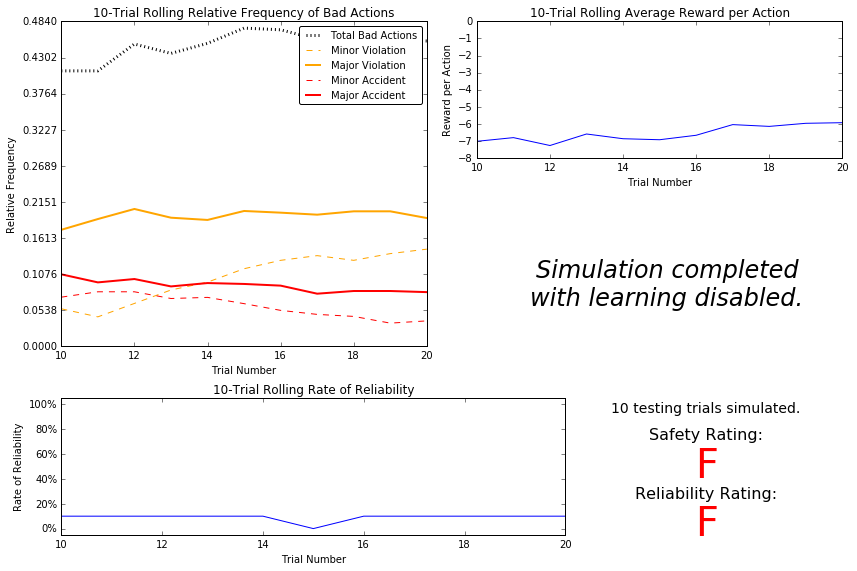

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**<br>
- based on the "Total bad actions" line from "Relative Frequency of Bad Actions" graph, the agent is making bad decisions in about 40-45% of times. Major Accidents are caused 8-10% of times and Minor Accidents are caused 5-7% of times. Together accidents comprise approximately a third of all bad actions taken by the agent.
- Rate of Reliability is calculated as the average success rate of the 9 previous and 1 current trials. If the agent was learning, we would expect more successful drives as the number of trials increases, hence, we would expect the 10-Trail Rolling Rate of Reliability increase as well. We observe that the rate of reliability does not change with the number of trials, which makes sense given that the agent is driving randomely and not learning.
- Based on environment.py, every step agent starts out with a reward between [-1, 1]. Penalty only applies to <u>valid</u> moves and is scaled to (0,1). This means that: 
    -  In the worst case scenario, an unlucky agent starts out with a reward of -1 for every new step. If that agent is only making valid moves, he receives a constant reward of 2 (if the action chosen was correct (aligned with waypoint) or the agent idled at a red light) or 1 (if the action was valid but incorrect) and a penalty between (0,1) for each move. So in case of a very unlucky agent performing only valid actions, reward for each step is calculated according to: $-1 +1 - (0,1)$. This function is bound by $(0,1)$ range.
    - Using the same logic, if the agent is very lucky (every time his initial reward is initiated to +1 and there are no red lights), his final reward for the valid move would be $1 + 2 - (0,1)$, which is between $(2,3)$.
    - So in both cases, if the agent is making valid moves only, his reward for each step is bound by $(0,3)$. We observe the average reward per step for the previous 10 simulations between -7 and -6, which suggests that agent is getting very heavily penalized. And this is consistent with environemnt.py, because if the agent is violating traffic rules, then he is getting a fixed negative reward for that step which is much lower (-5 for minor violation, -10 for major violation, -20 for minor accident and -40 for major accident) than reward he would get for making valid moves (0,3).
- The outcome of the results doesn't change significantly with the increase in the number of trials. The change observed is random. This is consistent with agent not learning anything from each iteration.
- This smart car received F rating for both, safety and reliability, and definitely is neither safe nor reliable at this moment. The main reason for this is that learning is not enabled and the car performes actions randomely, it doesn't really know how to follow traffic rules. So every time the car reaches its destination in the given time is by pure chance.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

**Waypoint** and **inputs** are the most relevant features for learning efficiency and safety, because:
- **`'Waypoint'`** describes the most efficient route to the destination given current location and direction of travel. Choosing an action that is not aligned with waypoint will bring the car further away from the destination, thus impacting efficiency.
- Intersection **`'inputs'`** determine if the chosen action is valid or not, hence affecting efficiency and safety. Choosing an invalid action (the one that violates thraffic rules) will result in the agent not moving from its current location (according to act() method from environment.py), so efficiency will be affected once more. In addition, choosing an invalid action also directly affects the safety score. Let's examine which inputs are needed to determine the validity of an action:
    - the colour of the `'light'` is the main input that determines if the agent commits a violation by moving in certain directions as well as its right of way, so this is an important input.
    - `'left'`, `'right'` and `'oncoming'` contain info about the intended direction of travel for the vehicle to the Smartcab's leff, right and across the intersection, respectively. All of these inputs are used at some point for penalty calculation in environment.py, but I think we can eiminate one of them and it won't affect the learning:
        - When the `'light'` is red, the Smartcab is not allowed to drive straight or left. It will always get a negative reward for doing so. The size of that negative reward will differ depending on other cars in the intersection (for eg., environment.py lines 311-312), but the Smartcab shouldn't be making a left turn or going straight either way. There are two valid moves the Smartcab can perform. 'None' is valid regardless of other agents in the enviroment, while 'right' is only valid when there is no traffic from the Smartcab's `'left'`. *This means that in case of the red light we still need to know the input from the `'left'`.*
        - When the `'light'` is green, the Smartcab can't idle (perfrom no action - minor violation). It also has the right of way going straight and turning right. But there are restrictions on the left turn - it can only turn left when there is no `'oncoming'` traffic. *This means that when the light is green, we only need to know `'oncoming'` input to drive safely.*
        - In both scenarios traffic on the **`'right'` didn't affect the validity of a move**. It can affect the size of the negative reward, but not the validity. Hence, **we can exclude this input from the learning process**.
    

I also find **deadline** not very relevant because it doesn't affect safety at all. It contributes mildly to the penalty function, but making an invalid move has a much higher impact on the reward than deadline. The agent would still be able to learn without a deadline enforced.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Consider features highlighted in Question 4, **Waypoint and Inputs**:
- Input `'Light'` takes on 2 values: Red, Green.
- Inputs `'Left'` and`'Oncoming'` can each take on 4 values: None, Left, Right, Forward.
- `'Waypoint'` can theoretically take 4 values, but the only time it will take value None is when the agent reaches the destination. So for the purposes of training, there only are 3 values `'Waypoint'` will actually take: Left, Right, Forward.

Given these possible values, the size of the state space is (2 x 4 x 4 x 3) = 96.

Now we need to understand the overall number of steps the agent has to learn:
1. The primary agent is given **at most 100 steps per trial** (environment.py, hard_time_limit, **when deadline is not enforced**) and there are 20 trials. This means that at most the agent has 100 x 20 = 2,000 steps to learn about 96 states. This doesn't look too bad, but there are no guarantees that the agent will get a chance to see all 96 possible states in the course of the 20 trials, because all inputs are random. 
2. Moreover, exploring 'initial_deadline' field in the log output file, we can see that the actual deadline is ususally between 20 and 30 steps. It is limited by the size of our grid:
    --> We have 8x6=48 intersections 
    --> the worst case scenario, the smartcar is initialed in one corner and the destination is in the diagonally opposite corner 
    --> the smartcar needs to travel 12 intersections (7 horizontally and 5 vertically) to get to the destination 
    --> 5 steps are allowed per intersection, so **with deadline enforced**, the agent has at most 12x5=**60 steps per trial**. And lower deadlines are more probable, and we have observed that in the trial we performed.
    So in this case, the agent will at most have 60x20=1200 steps for learning. More likely the number of steps will be about 30x20 = 600. Under these conditions it is quite unlikely that the agent will get a chance to see all possible 96 states. So given how the simulation runs (especially the expected number of steps per trial), 20 trials is most probably too little to see all states.
    
However, I do think that the agent will be able to learn a policy for each possible state within a reasonable amount of trainig trials, but that amount is much higher than 20. I think several thousand is reasonable, but I suppose this is a bit subjective and also depends on the time it takes to run a trial. In our case it is seconds, so I think a 5-10k trials is reasonable and the agent will probably see all the states over that period of time.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

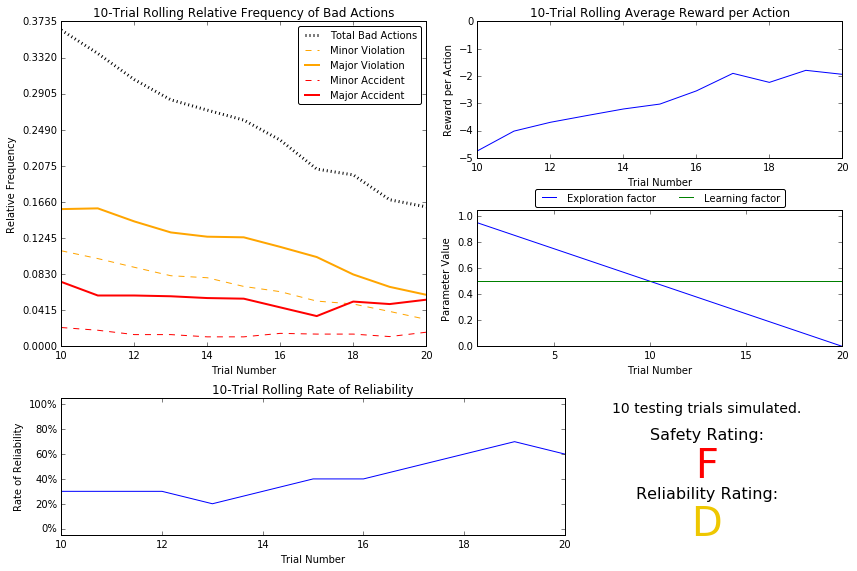

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- *Similarities between basic driving agent and default Q-learning agent:*
    - both agents start out by making similar number of mistakes as indicated by Relative Frequency of Bad Actions graph. Although, the default Q-learning agent performs better and better with each trial, so its frequency of bad actions is lower after forst 10 trials.
    - both agents got F as the Safety rating, so both are making too many mistakes
    - both agents start with comparable low rewards because they are penalized for bad actions taken
    - on the graphs, from the first observation we see that learning agent overall performas better than the basic agent. It is important to understand that the first observation on the graph averages performance from the first 10 trials, which appears to be enough time for the learning agent to learn something about the environment. If we were to look at the first few trials, that would be where the agents were most similar, because the exploration factor is still high for the learning agent which forces it to take lots of random actions, just like the basic agent, resulting in similar outcomes (conditinal on a specific case of course - some random actions are more lucky than the others)).
   
   
- *Agent required exactly 20 training trials before testing:*
    - According to simulator.py, testing switch can only be flipped if total_trial > 20 and epsilon < tolerance (when learning). So at least 20 training trials are necessary. If epsilon-tolerance condition is met, then 21st trial is the earliest trial that can become testing one.
    - Default value for tolerance is defined in the run() method of the same file and it is 0.05. I did not provide a different value for tolerance parameter when I executed agent.py, so 0.05 was used. 
    - Epsilon is initiated to 1.0 when Learning Agent is created (and I didn't override the default parameter). At the beginning of every trial epsilon is decayed by 0.05 according to our linear decay function. This decay function is implemented in agent.reset() function which is called by env.reset() which is in its turn executed at the beginning of each new trial when simulator.py is run. So starting with the 1st trial espsilon is decayed by 0.05 (1st trial is run with epsilon = 0.95). So at trial 20 espsilon is 0 (= 1 - 0.05\*20), and at trial 21 epsilon < 0 which is also less than tolerance (0.05). Hence, epsilon-tolerance condition is satisfied and trial 21 is the first testing trial. Also, we can tell from the graph and the excel log - last training trial is #20.
    - If only epsilone-tolerance was considered, then there would-ve only been 19 training trials, because epsilon-tolerance condition would've been satisfied at trial #20. So from this point of view, having trial 21 as the first testing trial doesn't make sense. But it also doesn't violate the condition. It is simply not used.
   
   
- *The decaying function for epsilon is accurately repsented in the parameters panel* - it is a linear funstion with slope (-0.05), and this is exactly what the parameters panel is showing.


- *As expected, as the number of training trials increases, agent which learns starts making fewer bad actions and, as a result, it receaves higher rewards.* This makes sense since the agent is learning about environment and actions that bring the highest rewards. The more training trial agent goes through, the more information it collects, the better its decision are. All graphs show improvement with the number of training trials.


- *Safety rating is still F*, despite all the learning. Agent is still making a lot of mistakes. *Reiability rating has gone up to D!* And this is great news - it is not a great rating, but it has improved after only 20 training trials.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

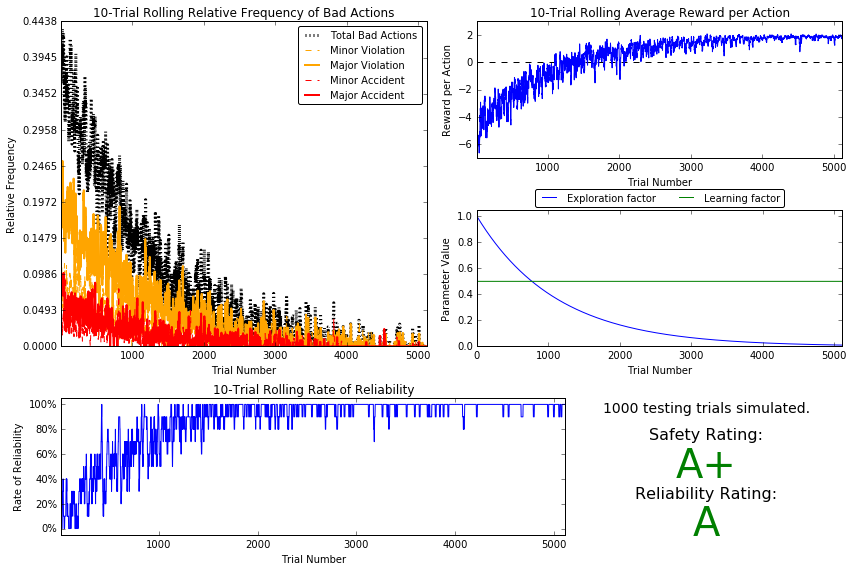

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- *Decaying function used for the exploration factor epsilon*: $ \epsilon = e^{-0.0009t}$
    - I wanted to compare all the suggested decaying functions
        ***
        **<u>UPDATE</u\>:** *Thanks to the reviewer feedback I was able to understand my mistake (~~scratched below~~) and update agent.py to be able to implement all the functions suggested for epsilone (lines 26 and 59). I tested the code and it ran successfully, but I decided not to redo the tasks I have already completed using my original epsilon implementation, because it is still correct and yields the same results the new implementation would yeild.*
        ***
        - So first, I solved the 3 equetions that use $a$ and $t$ for $a$ so that at trial 101 all these functions would cross the default tolerance value of 0.05 and the testing switch would be flipped. I wanted to guarantee myself 100 training trials and get an idea of the size of parameters that would give me that. For $\epsilon = \frac{1}{t^2}$, I solved for a new tolerance rate that would guarantee 100 trainning trials. You can see the values I solved for in my code, commented out.
        - ~~Then I realized that agent.reset() method (where the decay function is defined) is called at the beginning of each **STEP**, not **TRIAL**, and **trial number is stored as a local variable** in the While loop in simulation.py. So the only way I could think to pass the information about trial number to the reset() method was to alter simulation.py, environment.py and agent.py to add an extra input variable to reset() method. But the instructions say that we should only alter agent.py...~~
        - So then I thought that if I can **express $\epsilon_t$ as a function of $\epsilon_{t-1}$ and a constant** (like I did for linear decay), I can still implement the decaying functions suggested withought altering all the other files. You cannot express $\frac{1}{t^2}$ and $\cos(at)$ in this way, but it can be done for $ \epsilon = a^t$ and $\epsilon = e^{-at}$ ($\epsilon_t=\epsilon_{t-1}a$ and $\epsilon_t=\epsilon_{t-1}e^{-a}$, repsectively).  I ended up comparing the last 2 functions and linear decay as well. I found that performed similarly, but results under the selected function were slightly better.
        - When I realized that I would need way more than 100 trails, I tried reducing $a$ several times and stopped at $0.0009$.


- *Number of training trials*
    - As I mentioned above, I started with 100 training trials. But results were very poor/unstable. The smartcab was always getting extremely low safety ratings (F-D) and tweaking other parameters wouldn't help. Reliability rating was unstable. Sometimes it would be F, sometimes it would be A **under the same set of parameters**. From this behavior I concluded that I didn't have enough training trials:
        - this explained consistently poor safety rating. Even though the percent of bad actions declined significantly, it was still around 4%, which, together with a whole lot of states that were not explored during the 100 training trials, resulted in bad safety scores when testing.
        - it would also explain unstable reliability scores. Sometimes the smartcab got lucky and make it in time. Sometimes it would get unlucky.
    - I tried increasing the number of trials to 1000-2000, but results were similar (better of course, but not good enough) to what I have already observed.
    - I ended up increasing **the number of training trials to about 5000**. Then performace of the learning agent stabilized and was good.
    
    
- *Epsilon-tolerance & alpha:*
    - **Epsilon-tolerance** combination is mostly used to determine the number of training trials. Another thing that epsilon obviously affects is the probability at which exploration (choosing a random action) happens. So if we have 2 decaying functions for epsilon and both functions allow the same number of training trials but function A is decaying faster at the beginning (when epsilon is still high) and slower in the end (when epsilon is already tiny) than function B, then is we want more random exploration to happen at the start, we may want to choose B over A. In my case, the 2 suggested functions that I was able to compare declined at similar rates and when I compared them to a linear decay function, the suggested functions performed better. The rest I explained in the answer to the first question in great detail.
    - I tried playing with the **learning rate alpha** mostly when I was trying to make the agent learn from 100 trials. Increasing alpha to ~1 made the agent learn faster, because it would fully update its believes about rewards at states after the state is encountered. I tried reducing it to ~0 too, then the performance resembles the one witout learning at all, because beliefs are not really updated and the agent ends up choosing actions randomely. But either change didn't help me improve performnce of the agent, so I reverted to the **default value of 0.5** and didn't change it after that.


- *Improved Q-Learner performs much better than the default Q-Learner.* At the end of training:
    - Improved Q-Learner makes almost no bad actions while about 17% of all actions taken by the default Q-Learner are bad
    - Improved Q-Learner receives positive rewards of ~2 per eaction taken, while default model still receives negative rewards
    - Reliability of Improved Q-Learner reaches 95-100% while the default model reaches destimation in time in about 50% of trials
    - Finally, testing scores speak for themselves


- *I think testing acores of A+ and A over 1000 testing trials definitely show that the agent learned an appropriate policy*


- *I am satisfied with the safety and reliability ratings*

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

An **optimal policy** is a rule that suggests the best action for each state an agent can find himself in. In our case "best" means an action that wouldn't violate the traffic rules and get us to the destination as fast as possible. Given that our states are defined with waypoint (which is the direction the agent should follow to reach the destination) and intersection inputs, the optimal policy should be "follow the waypoint if traffic laws permit". Some examples:
- For a state defined by [waypoint:'forward', light: 'red', oncoming: 'forward', right: None, left: 'forward'], the optimal policy should be to idle at a red light. The agent wants to go straight, but the red light doesn't allow such behavior, so the best thing then is to wait for the light to change.
- For a state defined by [waypoint: 'left', light: 'green', oncoming: None, right: 'right', left: 'forward'], the optimal policy is to turn left, because left is where the destination is and the light is green and there is no oncoming traffic.

'sim_improved_learning.txt' shows that a lot of states have correct policies. For example:
     <br>(waypoint, light, oncoming, left) = ('**forward**', '**green**', 'left', None)
     <br>-- **forward : 1.34**
     <br>-- right : 0.41
     <br>-- None : 0.18
     <br>-- left : 0.62
         <br>*According to the waypoint, the right action to perform is to drive forward. The light is green, so the smartcab has the right of way and other directions of trafic are irrelevant, so the action with the highest Q-value in the Q-table should be "forward" - and it is!*
         <br>
    <br>(waypoint, light, oncoming, left) = ('**right**', '**green**', 'left', 'right')
     <br>-- forward : 0.67
     <br>-- **right : 1.94**
     <br>-- None : 1.16
     <br>-- left : 0.60
         <br>*According to the waypoint, the right action to perform is to drive right. The light is green, so the smartcab has the right of way and other directions of trafic are irrelevant, so the action with the highest Q-value in the Q-table should be "right" - and it is!*
         <br>
         <br>
There definitely are states where the policy is different than what I expect of an optimal policy. For example:
<br>(waypoint, light, oncoming, left) = ('**left**', '**green**', '**forward**','left'}")
 <br>-- forward : 0.45
 <br>-- **right : 0.91**
 <br>-- None : -5.22
 <br>-- left : -20.24
 <br>*The smartcab needs to turn left to reach its destination.The light is green but there is oncoming traffic, so the agent can't legally turn left. In my opinion, the optimal action would be to idle at a green light (but I suppose it is coded as a violation in evironment.py...) and go next time or at least go straight. The agent decides to turn right, which is in the opposite direction of where the destination is at. 
 <br>I guess it makes sense, in a way, not to idle at green light, because the left turn can never be guaranteed in this simulation (because there can always randomly be oncoming traffic + such action is coded as a violation), while 4 right turns can get a car to the same spot where one left would, but right turns are at the very least guranteed on a green light. 
 <br>The thing is though, that the simulation doesn't take future rewards into account, so it shouldn't be able to tell the difference between going forward and turning right in this specific case, because both moves are valid although incorrect (from the waypoint perspective), so they would get the same reward, given the time-penalty. But going right somehow accumulated higher Q-value than going straight...It probably has to do with the randomness involved in the initiation of the reward [-1,1] and action selection (if the action is randomely selected early on, learning rate alpha is higher than later in the simulation, so the positive reward would move the Q-value more into the positive range than the same positive reward received 1000 trials later).
 <br> So the bottom line is that the action with highest Q-value is not optimal given real worl driving conditions (you would drive into the intersection and turn left after the light changed to red, but this is not provisioned for in the simulation). And given the rules of the simulation, right turn ended up being better than going straight by chance.*
 
 And one more example, purely inefficient: the light is red (oncoming traffic is irrelevant), tarffic to the Smartcab's left if turning right, so the smartcab can turn right, way is clear. It should follow the waypoint and turn right, but it decided to idle ata red light. I suspect this happens for the same reason I explained above - chance.
 <br>(waypoint, light, oncoming, left) = ('**right**', 'red', 'left', '**right**')
  <br>-- forward : -9.69
  <br>-- right : 1.32
  <br>-- **None : 1.73**
  <br>-- left : -9.23

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
***
**Update 2:**

We are now alligned on the characteristics of the environment that make extra reward for reaching the destination a bad idea for this problem (random origin and destination for every trial, no consistency). One idea is still left to figure out. The feedback I received from the previous reviewer:
      
      """
      About the characteristic that has to do with the smartcab, you have made a lot of assumptions that are not quite valid here. The very first point: "We would need to come up with a set of states that the agent can transition to from the current state given the action taken (this determines if the agent gets to leave the current intersection or not) and the position of the destination (which will determine new waypoint if the agent was able to leave the intersection)"
    is not possible to achieve and is actually the reason we cannot take future rewards. For including the future rewards, we need to know the future or in other words, the state which the agent will transition into after taking an action from the current state. Is there really a way to know what the next state would be? Does the agent have any information beyond its current intersection?
        Remember, the waypoint is not always followed (eg, you might have to idle at a green light even if the waypoint is forward) and the action with the highest Q-value is not always taken (we take a random action with epsilon probability). This makes the smartcab egocentric in nature and we have no way to deduce what the "future" is.
      """

If I understand the feedback correctly, the reviewer suggested that it is impossible to calculate expected utility of the future state. I am not exactly following this. I understand that we need to know the future state to be able to calculate future rewards, but we don't need to know that state with certainty. As far as I understand knowing all possible future states and the probability of landing in each of them **GIVEN THE ACTION TAKEN** is enough. Michael and Charles discuss a similar problem in their lecture "Quiz: Finding Policies - 3". In that setting an agent is performing an action and it can end up in 3 possible states with probabilities 0.8, 0.1 and 0.1. And we were able to calculate expected future utility of each possible action. So my argument is that we **can** figure this out for the smartcab as well. Could you please review the points I am making below and tell me which assumptions are incorrect?
   1. First, the agent doesn't need to explicitly know anything beyond the current intersection. Currently, we have implemented a rule that updates Q-matrix. We would need to update that rule to include future rewards. So as long as WE can figure out the update rule without changing the inputs that the agent is receiving from the world, I believe the future rewards can be implemented.
   2. Next, the agent doesn't have to follow the waypoint. It doesn't really matter which action the agent takes (for <u>being able</u> to calculate future utility) - we need to calculate expected future utility for each possible action. It is very important that the utility is calculated GIVEN THE ACTION TAKEN because for each given action WE actually know what the next waypoint will be with certainty (we know where the agent is and where the destination is, we can call the next_waypoint() function). The agent doesn't know it. But I don't think it needs to. It is enough that WE know. Because since we know the waypoint of the next state with certainty (given the action taken in current state), we know all the future possible states and their probabilities:
       - these states are defined by the remaining features (light, left, oncoming). Each feature takes on one of its possible values copletely randomely. The features are independent of each other. So the next state is completely random and the probability of the agent finding itself in any state is 1/(2x4x4)=1/32. All future states (given the action taken) are equally likely.
       <br><br>
   3. So I don't see how this problem is now different from the one Charles and Michael discussed in the lecture. And it seems to me that we CAN actually IMPLEMENT the future rewards with expected utility. It will require some coding, but it can be done and we only need to work with the Q-matrix and the Q update rules. We don't need to alter the inputs the agent is receiving from the environment. 
       - Unless ultering the Q-learning update rule and matrix is considered changing the agent. In which case...how can you ever implement Q-learning without changing the agent even if the next state is deterministic??

The question of whether or not it makes sense to implement it this was is a different question. So my original argument was that including future rewards themselves (as long as there is no extra reward for reaching the destination) doesn't really affect learning. The details are below. So the real problem is in inclusing the extra reward for reaching the destination, and taking or not taking future rewards into account is irrelevant.

Thanks!
***
**Update 1:**


The feedback I received from the previous reviewer:
   1. Is the future environment state deterministic?
   2. Is the agent able to use prediction of the future based on its sensory inputs?

I think I have addressed these points in my detailed explanation below, so I am confused as to what this feedback is supposed to mean:
   1. I have clearly explained that the future state is not deterministic.
   2. I think ability of the agent to use prediction of the future is debatable. The sensory inputs do not include any information about the future. But, as far as I understand, in order to implement the future rewards in a non-deterministic game, we will have to calculate expected utility of future states. There is no other way to implement this, so if we are not expected to calculate utility of future states, we can't implement what we are asked to asses. And I don't understand what this question is about in that case. But if we are expected to calculate expected utility, in order to do that, agent doesn't need to learn anything about the future from it's sensory inputs. This information will be passed to the agent indirectly via the expected utility of the future state, which we can calculate (it will of course require changes to be made to the code, which I discuss in detail below).

I would like to understand what exactly I am missing in my answer below. Am I making incorrect assumptions? Please, correct me where I am wrong. I gave it a lot of thought and wrote about it in great detail specifically so you can see what I did not understand and give me pointed feedback. Thank you!
***
**Original Answer:**<br>

There are a few things we would need to do to the existing code to be able to implement discounting of the future rewards:
   1. We would need to come up with a set of states that the agent can transition to from the current state given the action taken (this determines if the agent gets to leave the current intersection or not) and the position of the destination (which will determine new waypoint if the agent was able to leave the intersection)
   2. Then we would need to calculate probabilities of arriving to each possible future state, to be able to calculate [the expected value of the next state] = SUM([prob of arriving to a specific state]*x*[max Q for that state]).
   3. Then we would need to update the function that updates Q-value for every state-action combination from a simple alpha-weighted average of existing belief and the new reward recieved for performing an action ($\hat{Q}(s,a) \leftarrow^\alpha {r}$) to the alpha-weighted average of existing belief and **the sum of** *the new reward recieved for performing an action* **and** *discounted expected max Q-value of the future state* ($\hat{Q}(s,a) \leftarrow^\alpha {r} + {\gamma } E[max_{a'}\hat{Q}(s',a')] $).
     
I think if we can fulfil 1-3, then we will have a system that will work. 
 
1. Consider $max_{a}\hat{Q}(s,a)$. For each possible ${s}$, $max_{a}\hat{Q}(s,a) \geq 0 $, because:
    - We initiate all Q's to 0.0
    - If an agent happened to make an illegal move early in the trials and get a negative penalty, the other moves the agent hasn't tried yet will have higher Q associated with them (0.0). Hence, early in the process, for most states $max_{a}\hat{Q}(s,a) = 0 $
    - At some point in the trials the agent will make a valid move and receive a positive reward and that move will become the best move for that state and $max_{a}\hat{Q}(s,a) > 0 $.  
    - Regardless of the state ${s}$ we end up in, there always is a legal move ${a}$ to be made. Legal moves have non-negative rewards associated with them. So <u>*after a good number of trials*</u> every singe possible future state will have $max_{a}\hat{Q}(s,a) > 0 $.  
    <br>
2. What are the possible effects of taking into account $max_{a'}\hat{Q}(s',a')$ of possible future states ${s'}$ on the action ${a}$ the agent will choose to take in the current state ${s}$?
    - As discussed above, this term is non-negative, so it can only increase $\hat{Q}$ associated with an action $a$ in the current state $s$, $\hat{Q}(s,a)$.
    - We know that $max_{a'}\hat{Q}(s',a')$ is higher when $a'$ is alligned with the waypoint in $s'$.
    - Waypoint is a non-random part of state configuration. We, as the creators of the simulation, know what the waypoint of the next state will be given the action taken in the current state and the location of the destination. The agent will still find itself in one of the 2(lights)x4(oncoming)x4(left)=32 possible states, but all those states will have the same waypoint.
    - If two possible actions $a_1$ and $a_2$ lead to the same waypoint, then the discounted expected future utility of the next state should be identical for these two actions. So **discounted future utility will have no effect on choosing between actions 1 and 2**.
    - If two possible actions $a_1$ and $a_2$ lead to different waypoints, then **the action that leads to more states where the agent will be able to follow the waypoint will have higher discounted expected future utility**. Hence, the action that leads to more states where the agent will be able to follow the waypoint will be preferred, all other things equal.
        - For example, if action $a_1$ leads to the states with the waypoint 'left' and action $a_2$ leads to states with the waypoint 'right', action $a_2$ has higher expected utility of the future actions than action $a_1$, because the only time the agent is able to turn left at an intersection is when the light is green and there is no oncoming trafic, while the agnet can always turn right when the light is green and can also turn right on the red light when there is no traffic coming from the left. This means that there are more states where the agent can follow a waypoint when the waypoint is 'right'. Hence, the probability of arriving to a state where the agent can follow the waypoint is higher when $a_2$ is performed.
    
Given the assumptions that I have made, I think including discounted future utility into the Q-learning function will lead to the preference of right turns over left, but that's about it. I don't see how it can negatively affect the learning process. Unless, you meant some other way to implement this.. I can think of the following:

1. I suggested to come up with a set of states that the agent can transition to given the action taken, and this is a huge assumption. I do think it's valid, because there is nothing random about next state's waypoint, as I explained above.. But I suppose we could also consider all states as equally possible, since the agent doesn't know anything about where the destination actually is (and how far away it is), it only knows the next waypoint. In this scenario, I don't see how dicounted future utility can hurt the model, because it will be exactly the same for each action in each state (since we consider all states possible and completely random, we will be calculating the expected utility over the same set of states every time).
<br><br>
2. I can see how adding a bonus for reaching the destination can hurt the learning process though. Since the environemnt is set up so that the destination and agent's initial location are assigned **randomely** at the beginning of each trial, this randomness will propagate extra value to random states/actions at random times.
    - Say, in the first trial we happened to reach destination by turning left and got a huge reward that now is propagated to a left turn in a specific state.
    - Now we start a new trial and the agent finds himself in the same state it made the very successful left turn in the previous trial, but the waypoint says to go stratight (and it is a valid move). The utility of a left turn is higher than the utility of following the waypoint, so the agent will turn left. This is not optimal for reaching the new destination!
    
**Bottom line:**
- if the bonus for reaching the destination is introduced, I can see how including discounted future utility in the Q-learning function can hurt the process due to the characteristics of the environment (random destination every trial).
- I don't see how agent's not knowing where/how far away the destination is affects anything. In the worst case scenario, it doesn't make a difference. I would really appreciate some explanation here! :)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.